# Week Six: Linear algebra and fitting


The goal of filling in the requested pieces is twofold: you should be able to run the worksheet and get the requested answer with the given dataset, and you should also be able to pass with different datasets (not given). These will often check unusual inputs, etc., so try to make sure all possible input datasets are accounted for.

To be graded, your notebook must be runnable start to finish. If you can't make an in-notebook test pass, comment it out for to attempt to get partial credit. You should replace the `...` markers with your code. Do not change the names of the pre-defined variables and functions.

In [ ]:
# EID is your 6+2 UC Electronic ID
EID = 'sixplus2'
NAME = 'Joe Smith'

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Other imports
# ...

## Problem 1: Rotation

Design a function `rotate(M, angle, axis=0)` that rotates `x` and `y` around an angle. The first axis must be length 2, and will be interpreted as x,y coordinates. You should support shapes of `(2,)` and `(2,N)` for input.

Use the standard rotation matrix,

$$
R = \left[
\begin{matrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) \\
\end{matrix}
\right]
$$

Include a reasonable docstring. A "reasonable" docstring should mention all the parameters at least. Ideally, you could use Numpy-style or Google-style, but that's not required.

In [2]:
def rotate(M, angle):
    '''...
    '''
    
    M = np.asarray(M)
    
    ...

In [3]:
rotate([1, 2], np.pi/2, axis=0) # -2, 1

TypeError: rotate() got an unexpected keyword argument 'axis'

In [4]:
rotate([[1,1,1], [2,2,2]], np.pi/2, axis=0)

TypeError: rotate() got an unexpected keyword argument 'axis'

## Problem 2: Matrix calculations

### Problem 2.1: Linear fit

In class I show a linear fit using a polynomial order 2 and least squares fit. Extend this to polynomial order 3 (without using the library fit functions) and provide a function that produces the fit coefficients when given an x and y vector.

<font color="blue">
2 bonus points: Make the order of the polynomial a function parameter instead, and support any N instead of just 3. Use the new name and signature commented out in the template below.

In [5]:
def fit_poly_3(x, y, sig):
    ...

# Bonus: Use this instead
# def fit_poly(x, y, sig, N):
#     ...
# 
# def fit_poly_3(x, y, sig):
#     return fit_poly(x, y, sig, 3)

In [68]:
t = np.linspace(1,2)
x = np.array([1., 1.1, 1.24, 1.35, 1.451, 1.5, 1.92])
y = np.array([0.52, 0.8, 0.7, 1.8, 2.9, 2.9, 3.6])
sig = np.array([.1, .1, .2, .3, .2, .1, .1])

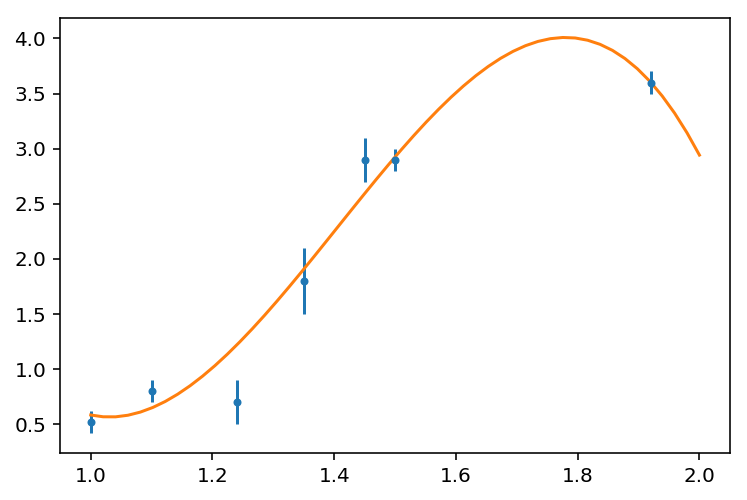

In [70]:
xvec = fit_poly_3(x, y, sig)
p = np.poly1d(xvec)
fig, ax = plt.subplots()
ax.errorbar(x, y, sig, fmt='.')
ax.plot(t, p(t))
plt.show()

## Problem 2.2: Chi sq calculation

Write a function that takes a set of data y values, calculated y values, and sigma values, and returns the chi squared.

In [71]:
def calc_chisq(y_data, y_calc, sig):
    return ...

In [74]:
chisq = calc_chisq(y, p(x), sig)
print('χ² =', chisq)
print('χ²/DoF =', chisq / (len(x) - 3))

χ² = 11.937013730597132
χ²/DoF = 2.984253432649283


## Problem 3: Fitting an exponential
Compute the best fit of the data to the exponential decay sample. You'll want to use an exponential function to fit:

$$
N(t) = N_0 e ^ {-t/\tau} 
$$

Use whatever libraries, etc. you can do do the fit.

I'll prepare a data sample for you using a random number generator, but keep in mind: you are fitting x and y values, not a set of random numbers. The x and y values are the bins of a histogram of those random numbers.

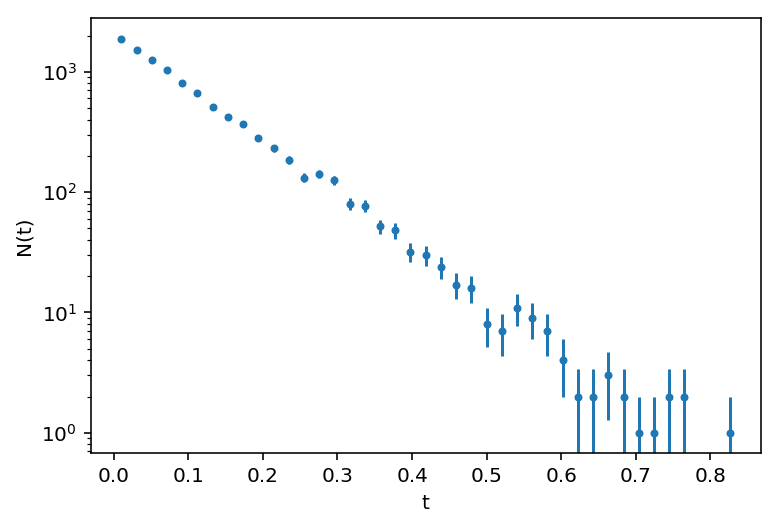

In [117]:
state = np.random.RandomState(42)
vals = state.exponential(.1, 10000)
y, edges = np.histogram(vals, bins=np.linspace(0,1,50))

# Compute bin centers instead of edges
x = (edges[1:] + edges[:-1])/2

# Filter out empty bins
x = x[y>0]
y = y[y>0]

# y / np.sqrt(y) = np.sqrt(y) = absolute error in counts
err = np.sqrt(y)

fig, ax = plt.subplots()
ax.errorbar(x, y, err, fmt='.')
ax.set_yscale('log')
ax.set_xlabel('t')
ax.set_ylabel('N(t)')
plt.show()

In [109]:
# You may want to define an exponential function here.
# ...

def compute_exponential_fit(x, y, err):
    '''
    Produces a length-two array or tuple of fit values (N₀ and τ).
    The initial guess should be the count in the first bin
    for N₀, and 1 for τ.
    '''
    
    ...

In [121]:
N_0, τ = compute_exponential_fit(x,y,err)

In [122]:
N_0, τ

(2096.038995069663, 0.09732640429473702)

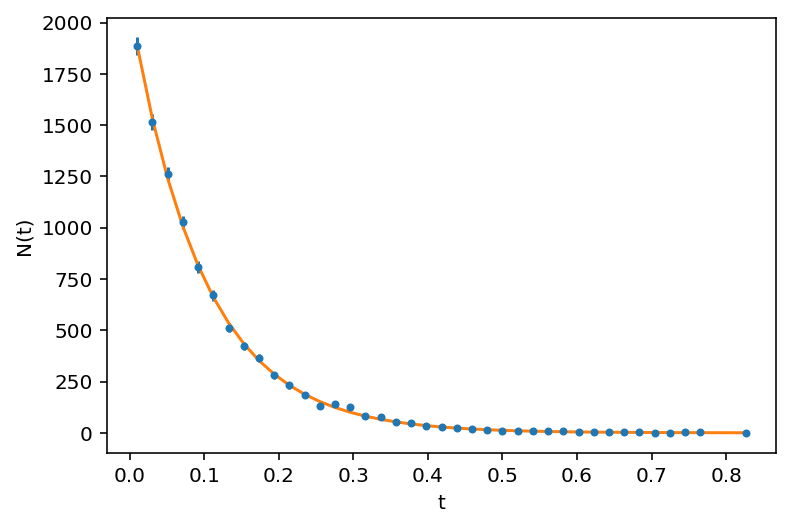

In [123]:
fig, ax = plt.subplots()
ax.errorbar(x, y, err, fmt='.')
ax.plot(x, N_0*np.exp(-x/τ))
ax.set_xlabel('t')
ax.set_ylabel('N(t)')
plt.show()